In [1]:
import numpy as np
import matplotlib.pyplot as plt


a_s = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
n_grids = [6,8,12,16,20,24,28,32,36,40,44,48]
errors = []

for a in a_s:
    error_a = []
    for n in n_grids:
        if a == 0.0:
            error = np.load("./kerr_result/error_a_%.3f_n_%d_fix_a_sweep_n.npy"%(a,n))
        else:
            error = np.load("./kerr_result/error_a_%.3f_n_%d_fix_n_sweep_a.npy"%(a,n))
        error_a.append(error)
    errors.append(error_a)
    
errors = np.array(errors)

Text(0, 0.5, 'MSE')

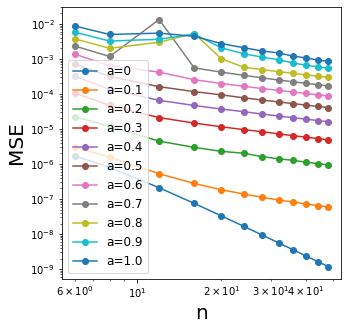

In [4]:
plt.figure(figsize=(5,5))
for i in range(11):
    plt.plot(n_grids, errors[i], marker="o")
plt.xscale('log')
plt.yscale('log')
plt.legend(["a=0", "a=0.1", "a=0.2", "a=0.3", "a=0.4", "a=0.5", "a=0.6", "a=0.7", "a=0.8", "a=0.9", "a=1.0"],fontsize=12)
plt.xlabel("n", fontsize=20)
plt.ylabel("MSE", fontsize=20)

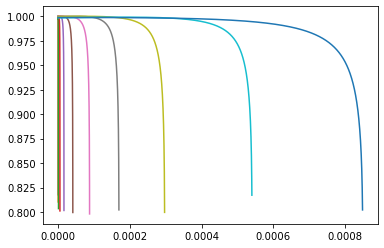

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
import scipy

start_id = 5
end_id = 100
score_a = []
A_a = []
eps0_a = []
alpha_a = []

for i in range(len(a_s)):
    error = errors[i]
    loss_w = error[start_id:end_id]
    log_ws = np.log(n_grids[start_id:end_id])
    log_loss = np.log(error[start_id:end_id])

    reg = LinearRegression().fit(log_ws[:,np.newaxis], log_loss)
    eps_max = np.min(loss_w)*0.999

    num_sweep = 10001
    eps0_sweep = np.linspace(0, eps_max, num=num_sweep)
    scores = []

    for i in range(num_sweep):
        score = np.abs(scipy.stats.pearsonr(log_ws, np.log(loss_w-eps0_sweep[i]))[0])
        scores.append(score)

    plt.plot(eps0_sweep, scores)

    max_id = np.argmax(scores)
    eps0 = eps0_sweep[max_id]
    score_best = scores[max_id]
    reg.fit(log_ws[:,np.newaxis], np.log(loss_w-eps0))
    alpha = reg.coef_[0]
    A = np.e**reg.intercept_
    #print(eps0)
    #print(alpha)
    #print(A)
    #[eps0, A, alpha]
    A_a.append(A)
    eps0_a.append(eps0)
    alpha_a.append(alpha)
    score_a.append(score_best)
    
A_a = np.array(A_a)
eps0_a = np.array(eps0_a)
alpha_a = np.array(alpha_a)
score_a = np.array(score_a)

Text(0, 0.5, '$\\epsilon_0+10^{-16}$')

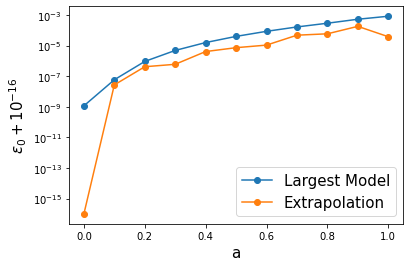

In [15]:
plt.plot(a_s, errors[:,-1], marker="o")
plt.plot(a_s, eps0_a+1e-16, marker="o")
plt.yscale('log')
plt.legend(["Largest Model", "Extrapolation"], fontsize=15)
plt.xlabel("a", fontsize=15)
plt.ylabel(r"$\epsilon_0+10^{-16}$", fontsize=15)

(0.0, 4.0)

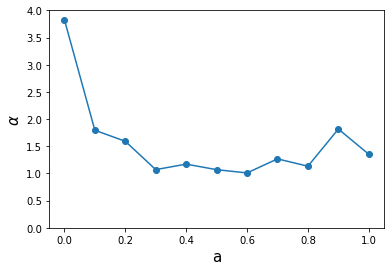

In [16]:
plt.plot(a_s, -alpha_a, marker="o")
plt.xlabel("a", fontsize=15)
plt.ylabel(r"$\alpha$", fontsize=15)
plt.ylim(0,4)